# Getting Started

---

  [Dependences](#Dependences)
| [Basic usage](#Basic-usage)
| [Using preamble](#Using-preamble)
| [Loading packages and libraries](#Loading-packages-and-libraries)
| [Scaling the output](#Scaling-the-output)
| [Rasterize the image](#Rasterize-the-image)
| [Save](#Save)
| [Using IPython strings](#Using-IPython-strings)
| [Jinja templates](#Jinja-templates)
| [TeX Program](#TeX-Program)
| [Debugging](#Debugging)
| [Usage as a Package](#Usage-as-a-Package)

---

## Dependences

### LaTeX

LaTeX must be installed using one of the following distributions:

- [TeX Live](https://tug.org/texlive/) (All Platforms)
- [MikTeX](https://miktex.org/) (Windows)
- [MacTeX](https://www.tug.org/mactex/) (Mac)

### Poppler

This application requires Poppler’s `pdftocairo`. You must install it beforehand.

#### Conda - Platform Independent

```shell
conda install -c conda-forge poppler
```

#### Windows

Download Poppler for Windows [here](https://github.com/oschwartz10612/poppler-windows/releases/). You must add the `bin` folder to your [PATH](https://www.c-sharpcorner.com/article/how-to-addedit-path-environment-variable-in-windows-11/).

#### Linux

Most distributions come with `pdftocairo`. If it is not installed, refer to your package manager and

#### Mac

Install using `brew`:

```shell
brew install poppler
```

To check if `pdftocairo` is installed on your system, you can use the following command:

In [1]:
!pdftocairo -v

pdftocairo version 24.04.0
Copyright 2005-2024 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC


Alternatively, if you are facing issues, you can configure the `pdftocairo` location (for use in `jupyter_tikz`) by setting the environment variable `JUPYTER_TIKZ_PDFTOCAIROPATH`:

```python
import os
custom_pdftocairo_path = os.path.join(
        os.getenv("LOCALAPPDATA"), "Poppler", "Library", "bin", "pdftocairo.exe"
    )
os.environ["JUPYTER_TIKZ_PDFTOCAIROPATH"] = custom_pdftocairo_path
```

### Jinja2 (Optional)

Jinja2 is necessary only if you plan to use [Jinja2 templates](http://jinja.pocoo.org/docs/latest/templates/). To install it, use:

```shell
pip install jinja2
```

## Basic usage

Load `jupyter_tikz`. It is a magic cell extension:

In [2]:
%load_ext jupyter_tikz

Show help by typing `%tikz?`

In [3]:
%tikz?

Docstring:
::

  %tikz [-p LATEX_PREAMBLE] [-t TEX_PACKAGES] [-nt] [-l TIKZ_LIBRARIES]
            [-lp PGFPLOTS_LIBRARIES] [-i] [-f] [-j] [-pj] [-sc SCALE] [-r]
            [-d DPI] [-e] [-tp TEX_PROGRAM] [-ta TEX_ARGS] [-s SAVE_TEX]
            [-S SAVE_IMAGE]
            [code]

Renders a TikZ diagram in a Jupyter notebook cell. This function can be used as both a line magic (%tikz) and a cell magic (%%tikz).

When used as cell magic, it executes the TeX/TikZ code within the cell:
    Example:
        In [3]: %%tikz
                \begin{tikzpicture}
                    \draw (0,0) rectangle (1,1);
                \end{tikzpicture}

When used as line magic, the TeX/TikZ code is passed as an IPython string variable:
    Example:
        In [4]: %tikz "$ipython_string_variable_with_code"

Additional options can be passed to the magic command to control the output:
    Example:
        In [5]: %%tikz -i --rasterize --dpi=1200 -l arrows,automata
                \draw (0,0) rectangle (1

Create a simple `tikzpicture`:

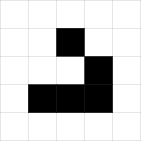

In [4]:
%%tikz
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black] (1, 1) rectangle (2, 2);
    \draw[fill=black] (2, 1) rectangle (3, 2);
    \draw[fill=black] (3, 1) rectangle (4, 2);
    \draw[fill=black] (3, 2) rectangle (4, 3);
    \draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}

Alternatively, generate TikZ output using a complete document by using the `-f` (or `--full-document`) parameter:

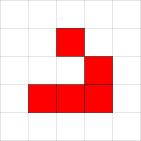

In [5]:
%%tikz -f
\documentclass[tikz]{standalone}
\begin{document}
    \begin{tikzpicture}
        \draw[help lines] grid (5, 5);
        \draw[fill=red] (1, 1) rectangle (2, 2);
        \draw[fill=red] (2, 1) rectangle (3, 2);
        \draw[fill=red] (3, 1) rectangle (4, 2);
        \draw[fill=red] (3, 2) rectangle (4, 3);
        \draw[fill=red] (2, 3) rectangle (3, 4);
    \end{tikzpicture}
\end{document}

Or, write only the content inside the `tikzpicture` environment by using the `-i` (or `--implicit-pic`) parameter. This will generate a standalone document with the `tikzpicture` environment:

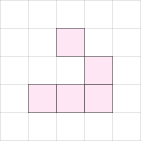

In [6]:
%%tikz -i
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

> **Attention:** You cannot use `-f` and `-i` together.

In [7]:
%%tikz -i -f
    \draw (0,0) rectangle (1,1);

Can't use --full-document and --implicit-pic together


## Using preamble

You can set a preamble by using the flag `-p="$<name_of_preamble>"` (or `--preamble="$<name_of_preamble>"`). The preamble includes all LaTeX code before `\begin{document}`, except for the `documentclass` line.

Adding a preamble defining a custom color:

In [8]:
preamble = r"""
\usepackage{tikz}
\usepackage{xcolor}
\definecolor{my_color}{RGB}{0, 238, 255}
"""

Reuse the preamble in a standalone TeX document:

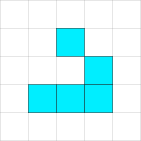

In [9]:
%%tikz -p "$preamble"
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=my_color] (1, 1) rectangle (2, 2);
    \draw[fill=my_color] (2, 1) rectangle (3, 2);
    \draw[fill=my_color] (3, 1) rectangle (4, 2);
    \draw[fill=my_color] (3, 2) rectangle (4, 3);
    \draw[fill=my_color] (2, 3) rectangle (3, 4);
\end{tikzpicture}

This also works with an implicit `tikzpicture` environment:

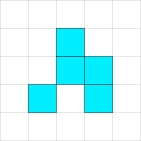

In [10]:
%%tikz -p "$preamble" -i
\draw[help lines] grid (5, 5);
\draw[fill=my_color] (1, 1) rectangle (2, 2);
\draw[fill=my_color] (3, 1) rectangle (4, 2);
\draw[fill=my_color] (2, 2) rectangle (3, 3);
\draw[fill=my_color] (3, 2) rectangle (4, 3);
\draw[fill=my_color] (2, 3) rectangle (3, 4);

## Loading packages and libraries

If you are not using the `-f` (or `--full-document`) flag, it's often useful to:

- Set the `\usepackage{X,Y,Z}` via `--t=<X,Y,Z>` (or `--tex-packages=<X,Y,Z>`)
- Set the `\usetikzlibrary{X,Y,Z}` via `--l=<X,Y,Z>` (or `--tikz-libraries=<X,Y,Z>`)
- Set the `\usepgfplotslibrary{X,Y,Z}` via `-lp=<X,Y,Z>` (or `--pgfplots-libraries=<X,Y,Z>`)

> **Note:** The `tikz` package is imported automatically.

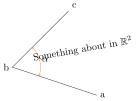

In [11]:
%%tikz -i -l=quotes,angles -t=amsfonts
% Example from Paul Gaborit
% http://www.texample.net/tikz/examples/angles-quotes/
\draw
    (3,-1) coordinate (a) node[right] {a}
    -- (0,0) coordinate (b) node[left] {b}
    -- (2,2) coordinate (c) node[above right] {c}
    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
    {angle=a--b--c};
    
\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};

If you don't want to import the `tikz` package, you can use the flag `-nt` (or `--no-tikz`):

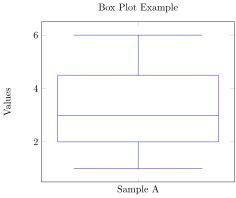

In [12]:
%%tikz -i -nt -t=pgfplots --pgfplots-libraries=statistics
\begin{axis}[
    title={Box Plot Example},
    boxplot/draw direction=y,
    ylabel={Values},
    xtick={1,2,3},
    xticklabels={Sample A, Sample B, Sample C},
]
% Sample A
\addplot+[
    boxplot prepared={
        median=3,
        upper quartile=4.5,
        lower quartile=2,
        upper whisker=6,
        lower whisker=1,
    },
] coordinates {};
\end{axis}

## Scaling the output

You can scale the Tikz image using the `-sc` (or `--scale`) parameter:
> **Note**: It uses `\boxscale` from the `graphicx` package

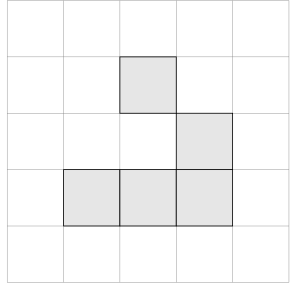

In [13]:
%%tikz -i -sc=2
\draw[help lines] grid (5, 5);
\draw[fill=black!10] (1, 1) rectangle (2, 2);
\draw[fill=black!10] (2, 1) rectangle (3, 2);
\draw[fill=black!10] (3, 1) rectangle (4, 2);
\draw[fill=black!10] (3, 2) rectangle (4, 3);
\draw[fill=black!10] (2, 3) rectangle (3, 4);

Which also works with standalone documents:
> **Note**: Not applicable with the `-f` (or `--full-document`) parameter

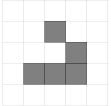

In [14]:
%%tikz -sc=0.75
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
    \draw[fill=black!50] (3, 1) rectangle (4, 2);
    \draw[fill=black!50] (3, 2) rectangle (4, 3);
    \draw[fill=black!50] (2, 3) rectangle (3, 4);
\end{tikzpicture}

## Rasterize the image

You can display the output as a rasterized (`png`) image by setting the `-r` (or `--rasterize`) parameter.

It is also possible to set the resolution (dots per inch) by using `-d=<dpi_of_image>` (or `--dpi=<dpi_of_image>`):

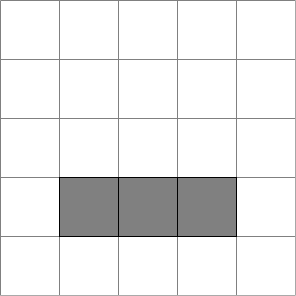

In [15]:
%%tikz -r --dpi=150
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
    \draw[fill=black!50] (3, 1) rectangle (4, 2);
\end{tikzpicture}

## Save

You can save the image output by setting `-S=<name_of_image>` (or `--save-image=<name_of_image>`):

> **Note:** The magic automatically detects the output format. Including the file extension (`.png` or `.svg`) is optional.

Saving an `svg` file:

> **Note:** You can specify folders by using the `-S` parameter (e.g., `-S=outputs/file_name` saves to `./outputs/conway.svg`).

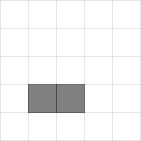

In [16]:
%%tikz --save-image=outputs/conway
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

Saving a `png` file:

> **Note:** Use the `-r` or `--rasterize` argument.

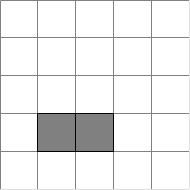

In [17]:
%%tikz --save-image=outputs/conway.png --rasterize
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

You can save TikZ (or LaTeX) output by using `-s=<tikz_file.tikz>` (or `--save-tex=<tex_file.tikz>`):

> **Note:** This command saves the cell content to a file.

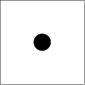

In [18]:
%%tikz --save-image=outputs/a_dot -s=outputs/a_dot.tikz
\begin{tikzpicture}[scale=3]
    \draw (0,0) rectangle (1,1);
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

To make it easier, set the `JUPYTER_TIKZ_SAVEDIR` environment to always save files in a custom folder:

In [19]:
import os

current_dir = os.getcwd()
os.environ["JUPYTER_TIKZ_SAVEDIR"] = os.path.join(current_dir, "outputs")

Now, render the `tikzpicture` and save the output:

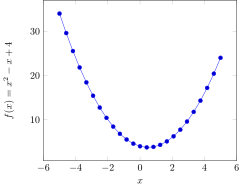

In [20]:
%%tikz -S=quadratic -s=quadratic.tikz -i -t=pgfplots -nt
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

In [21]:
del os.environ["JUPYTER_TIKZ_SAVEDIR"]

## Using IPython strings

Sometimes, you may want to generate a TikZ document from a string, rather than from cell content. You can do this using line magic.

In [22]:
conway_str = r"""\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta] (1, 1) rectangle (2, 2);
\draw[fill=magenta] (2, 1) rectangle (3, 2);
\draw[fill=magenta] (3, 1) rectangle (4, 2);
\draw[fill=magenta] (3, 2) rectangle (4, 3);
\draw[fill=magenta] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}"""

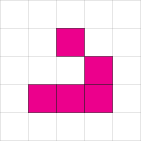

In [23]:
%tikz -f -S=cornway_image -s=cornway_code.tex conway_str

## Jinja templates

To help ensure that TikZ pictures stay aligned with your data, you can use [Jinja2 templates](http://jinja.pocoo.org/docs/latest/templates/).

> **Note:**
> Before using it, you must install Jinja2:
> 
> ```shell
> pip install jinja2
> ```

First, we need to populate some data:

In [24]:
node_names = "ABCDEF"
nodes = {s: int(365 / len(node_names) * i) for i, s in enumerate(node_names)}
n = len(nodes)
nodes

{'A': 0, 'B': 60, 'C': 121, 'D': 182, 'E': 243, 'F': 304}

Then, you can interpret the cell source as a Jinja2 template using the `-j` (or `--as-jinja`) parameter:

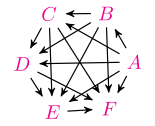

In [25]:
%%tikz -j -l=arrows,automata -sc=2
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=magenta] (v{{ loop.index0 }}) at ({{ angle }}:1) {${{ name }}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}
\end{tikzpicture}

It also works for full documents and implicit pictures.

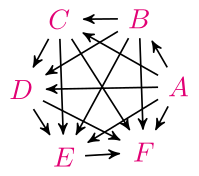

In [26]:
%%tikz --as-jinja -f -r -d=200
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}
\end{tikzpicture}
\end{document}

Sometimes, you'll make mistakes. Debugging transpiled code is challenging, especially without a mapping.

To assist, you can print the Jinja template using `-pj` (or `--print-jinja`):

> **Note:** The saved code file is also the interpolated code source.

\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  \node[color=magenta] (v0) at (0:1) {$A$};
  \node[color=magenta] (v1) at (60:1) {$B$};
  \node[color=magenta] (v2) at (121:1) {$C$};
  \node[color=magenta] (v3) at (182:1) {$D$};
  \node[color=magenta] (v4) at (243:1) {$E$};
  \node[color=magenta] (v5) at (304:1) {$F$};
  \path (v0) edge (v1);
         \path (v0) edge (v2);
         \path (v0) edge (v3);
         \path (v0) edge (v4);
         \path (v0) edge (v5);
         \path (v1) edge (v2);
         \path (v1) edge (v3);
         \path (v1) edge (v4);
         \path (v1) edge (v5);
         \path (v2) edge (v3);
         \path (v2) edge (v4);
         \path (v2) edge (v5);
         \path (v3) edge (v4);
         \path (v3) edge (v5);
         \path (v4) edge (v5);
         \end{tikzpicture}


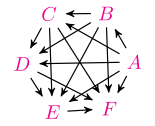

In [27]:
%%tikz --as-jinja -l=arrows,automata -sc=2 --save-tex=outputs/jinja_rendered.tikz -pj
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=magenta] (v{{ loop.index0 }}) at ({{ angle }}:1) {${{ name }}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

## TeX Program

You can change the TeX program using `-tp=<tex_program>` or `--tex-program=<tex_program>`:

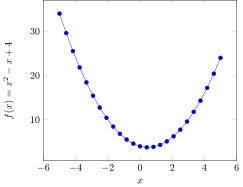

In [28]:
%%tikz -i -t=pgfplots -nt -tp=lualatex
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

You can also pass custom parameters to the TeX program:

In [29]:
tex_params = "--enable-write18 --extra-mem-top=10000000"

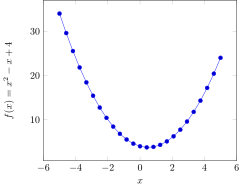

In [30]:
%%tikz -i -t=pgfplots -nt -tp=pdflatex --tex-args="$tex_params"
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

## Debugging

If you write invalid TikZ code, it will display the LaTeX command line error message:

> **Note:** Since LaTeX command line error messages tend to be verbose, by default, only the tail (last 20 lines) is shown.

In [31]:
%%tikz -i
% Error: Forgot Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

ase.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/00miktex\epstopdf-sys.c
fg))

! Package tikz Error: Giving up on this path. Did you forget a semicolon?.

See the tikz package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.7 	\end{tikzpicture}
                      
? 
! Emergency stop.
 ...                                              
                                                  
l.7 	\end{tikzpicture}
                      
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on tikz.log.


If you want to see the entire error message, you can use the `-e` (or `--full-error`) parameter:

In [32]:
%%tikz -i -e
% Error: Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=pdflatex.fmt)
 restricted \write18 enabled.
entering extended mode
(tikz.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-03-14>

(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
ls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/tools\shellesc.sty)
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifluatex.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/xkeyval\xkeyval.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkeyval.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkvutils.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\keyval.tex)))
)
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/sta

## Usage as a Package

It is also possible to use Jupyter TikZ as a package.

First, import the package:

In [33]:
import jupyter_tikz as jtikz

The available functions are:

- `build_template_extras`
- `build_tex_string`
- `run_latex`
- `save`
- `render_jinja`

To learn more about the functions, you can use the `help(...)`:

In [34]:
help(jtikz.build_template_extras)

Help on function build_template_extras in module jupyter_tikz.jupyter_tikz:

build_template_extras(no_tikz: bool = False, tex_packages: str = '', tikz_libraries: str = '', pgfplots_libraries: str = '') -> str
    This function constructs a LaTeX preamble string for TikZ diagrams, including any additional LaTeX packages or libraries specified.
    
    Args:
        no_tikz (bool, optional): A flag to indicate whether the TikZ package should be imported. If True, the TikZ package is not imported; if False, the TikZ package is imported. Default is False.
        tex_packages (str, optional): A comma-separated list of additional LaTeX packages to include. These packages are included in the preamble.
        tikz_libraries (str, optional): A comma-separated list of TikZ libraries to include. These libraries are included in the preamble.
        pgfplots_libraries (str, optional): A comma-separated list of PGFPlots libraries to include. These libraries are included in the preamble.
    
   

In [35]:
help(jtikz.build_tex_string)

Help on function build_tex_string in module jupyter_tikz.jupyter_tikz:

build_tex_string(src: str, implicit_pic: bool = False, extras: str = '', scale: float = 1) -> str
    This function prepares a LaTeX string for rendering TikZ diagrams.
    
    It can either wrap the provided TikZ code in a TikZpicture environment or treat the code as standalone. Additional LaTeX commands can be included through the `extras` parameter.
    
    Args:
        src (str): The TikZ code to be included in the LaTeX string. This code is either wrapped in a TikZpicture environment or left as is, based on the `implicit_pic` flag.
        implicit_pic (bool, optional): Determines whether the TikZ code should be wrapped in a TikZpicture environment. If True, the code is wrapped; if False, the code is treated as standalone latex class. Default is False.
        extras (str, optional): Additional LaTeX commands to be included. These can be preamble commands or commands to be included within the document envir

In [36]:
help(jtikz.run_latex)

Help on function run_latex in module jupyter_tikz.jupyter_tikz:

run_latex(src: str, rasterize: bool = False, tex_program: Literal['pdflatex', 'xelatex', 'lualatex'] = 'pdflatex', tex_args: str = '', dpi: int = 96, full_err: bool = False, save_image: str = None) -> Union[IPython.core.display.Image, IPython.core.display.SVG, NoneType]
    This function compiles a LaTeX string containing TikZ code and returns an SVG or rasterized image.
    
    Parameters:
    
    - src (str): The LaTeX string containing the TikZ code to be compiled.
    - rasterize (bool, optional): A flag indicating whether the output should be rasterized. If True, the output is rasterized; if False, the output is an SVG image. Default is False.
    - tex_program (str, optional): The TeX program to use for rendering the TikZ code. This can be one of "pdflatex", "xelatex", or "lualatex". Default is "pdflatex".
    - tex_args (str, optional): Additional arguments to pass to the TeX program.
    - dpi (int, optional): T

In [37]:
help(jtikz.save)

Help on function save in module jupyter_tikz.jupyter_tikz:

save(src: str, dest: str, format: Literal['svg', 'png', 'code'] = 'code') -> Optional[str]
    Saves the source code or image to the specified destination path.
    
    Args:
        src (str): The source code or image path.
        dest (str): The destination path.
    
    Returns:
        str | None: The path to the saved file, or None if destination is None.



In [38]:
help(jtikz.render_jinja)

Help on function render_jinja in module jupyter_tikz.jupyter_tikz:

render_jinja(src: str, ns: dict[str, str]) -> Optional[str]
    Renders the Jinja template with the provided namespace.
    
    Args:
        src (str): The Jinja template source code.
        ns (dict): The namespace to use for rendering the template.
            Example: `locals()` or `globals()`.
    
    Returns:
        str | None: The rendered template, or None if jinja2 is not installed.



Now, let's render a TikZ picture:

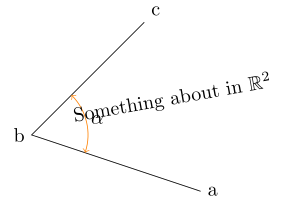

In [39]:
# Part 1: Construct the preamble
extras = jtikz.build_template_extras(
    tex_packages="amsfonts", tikz_libraries="quotes,angles"
)

# Part 2: Defining the source
src = r"""% Example from Paul Gaborit
% http://www.texample.net/tikz/examples/angles-quotes/
\draw
    (3,-1) coordinate (a) node[right] {a}
    -- (0,0) coordinate (b) node[left] {b}
    -- (2,2) coordinate (c) node[above right] {c}
    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
    {angle=a--b--c};
    
\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};
"""

# Part 3: Construct the TeX string
tex_string = jtikz.build_tex_string(src, extras=extras, implicit_pic=True, scale=2)

# Part 4: Render the LaTeX string to an image
img = jtikz.run_latex(tex_string, save_image="outputs/angle")
display(img)

# Part 5: Save the source as a TikZ file
jtikz.save(src, "outputs/angle.tikz");

You can also use a full TeX input:

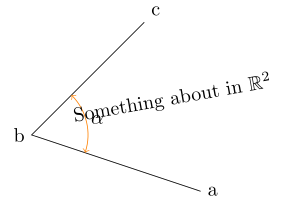

In [40]:
src = r"""\documentclass{standalone}
\usepackage{graphicx}
\usepackage{tikz}
\usepackage{amsfonts}
\usetikzlibrary{quotes,angles}
\begin{document}
	\scalebox{2}{
	\begin{tikzpicture}
		% Example from Paul Gaborit
		% http://www.texample.net/tikz/examples/angles-quotes/
		\draw
		    (3,-1) coordinate (a) node[right] {a}
		    -- (0,0) coordinate (b) node[left] {b}
		    -- (2,2) coordinate (c) node[above right] {c}
		    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
		    {angle=a--b--c};
    
		\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};
	\end{tikzpicture}
	}
\end{document}"""

jtikz.run_latex(src)